## Feature Engineering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

def angle(gp, p):
    """
        gp - goal coordinates
        p- puck coordinates
        angle in radians
    """
    if gp[0] > 0:
        vector = (gp[0] - p[0])+((gp[1]-p[1])*1j)
        angle = np.angle(vector, deg=True)
    else:
        vector = (p[0]-gp[0])+((p[1]-gp[1])*1j)
        angle = np.angle(vector, deg=True)
    return angle

def distance(gp, p):
    """
        gp - goal coordinates
        p- puck coordinates
    """
    distance = np.sqrt((gp[0] - p[0])**2 + (gp[1] - p[1])**2)
    return distance

a = (-89, 0)
b = (10, -15)
print(angle(a, b))
print(distance(a,b))

-8.615648184164113
100.12991560967181


### Train DF (To be done for test DF as well)

In [3]:
from  ift6758.data.data_acquisition import Season
import pandas as pd

ModuleNotFoundError: No module named 'ift6758'

In [4]:
train_years = [2015,2016,2017,2018]
seasons= []
periods=[]
for yr in train_years:
    season = Season(yr,"../ift6758/data")
    df_season = season.clean_data()
    df_period = season.periodInfo()
    seasons.append(df_season)
    periods.append(df_period)






NameError: name 'Season' is not defined

In [8]:
df_seasons = pd.concat(seasons).reset_index(drop=True)
df_periods = pd.concat(periods).reset_index(drop=True)

In [9]:
df_seasons.head()

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,NaN,NaN,Brad Boyes,Carey Price
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,NaN,NaN,Nazem Kadri,Carey Price
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,NaN,NaN,Nazem Kadri,Carey Price
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,NaN,NaN,Daniel Winnik,Carey Price
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,NaN,NaN,Joffrey Lupul,Carey Price


In [10]:
df_periods.head()

,periodType,startTime,endTime,num,ordinalNum,goals,shotsOnGoal,rinkSide,gamePk,teamname,isHomeTeam,goalCoordinates
0,REGULAR,2015-10-07T23:20:43Z,2015-10-08T00:00:58Z,1,1st,0,11,right,2015020001,Toronto Maple Leafs,True,"(-89, 0)"
1,REGULAR,2015-10-08T00:19:18Z,2015-10-08T01:00:15Z,2,2nd,1,16,left,2015020001,Toronto Maple Leafs,True,"(89, 0)"
2,REGULAR,2015-10-08T01:18:42Z,2015-10-08T01:56:34Z,3,3rd,0,10,right,2015020001,Toronto Maple Leafs,True,"(-89, 0)"
3,REGULAR,2015-10-08T00:32:37Z,2015-10-08T01:06:34Z,1,1st,1,12,right,2015020002,Chicago Blackhawks,True,"(-89, 0)"
4,REGULAR,2015-10-08T01:25:05Z,2015-10-08T02:00:48Z,2,2nd,1,8,left,2015020002,Chicago Blackhawks,True,"(89, 0)"


In [11]:
map_columns = {"periodType": "about.periodType", "num": "about.period","teamname":"team.name" }
df_periods_to_join = df_periods[list(map_columns.keys())+["gamePk","goalCoordinates"]].rename(columns=map_columns)
df_periods_to_join.head()

,about.periodType,about.period,team.name,gamePk,goalCoordinates
0,REGULAR,1,Toronto Maple Leafs,2015020001,"(-89, 0)"
1,REGULAR,2,Toronto Maple Leafs,2015020001,"(89, 0)"
2,REGULAR,3,Toronto Maple Leafs,2015020001,"(-89, 0)"
3,REGULAR,1,Chicago Blackhawks,2015020002,"(-89, 0)"
4,REGULAR,2,Chicago Blackhawks,2015020002,"(89, 0)"


In [12]:
df_seasons_periods = df_seasons.merge(df_periods_to_join, how='left',on=["about.periodType","about.period","team.name","gamePk"])

In [130]:
# merged = df_seasons.merge(df_periods_to_join, indicator=True, how='outer')
# merged[merged['_merge'] == 'right_only'] # <-- Indicated no shot are taken by the team in that period/


In [131]:
# merged[merged['_merge'] == 'left_only']# <-- Indicated all are shootouts not captured in line score of JSON


### Corection of Coordinates for shootout

In [15]:
def correctionCoordinates(r):
    if isinstance(r["goalCoordinates"], tuple):
        return r["goalCoordinates"]
    else:
        if r["coordinates.x"]>0:
            return (89,0)
        else:
            return (-89,0)
df_seasons_periods["goalCoordinates"] = df_seasons_periods.apply(lambda r: correctionCoordinates(r),axis=1)

In [16]:
df_seasons_periods.head()

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,NaN,NaN,Brad Boyes,Carey Price,"(-89, 0)"
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,NaN,NaN,Nazem Kadri,Carey Price,"(-89, 0)"
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,NaN,NaN,Nazem Kadri,Carey Price,"(-89, 0)"
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,NaN,NaN,Daniel Winnik,Carey Price,"(-89, 0)"
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,NaN,NaN,Joffrey Lupul,Carey Price,"(-89, 0)"


### Empty Net nans as 0

In [17]:
df_seasons_periods["result.emptyNet"] = df_seasons_periods["result.emptyNet"].fillna(0)
df_seasons_periods.head()

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)"
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)"
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)"
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)"
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)"


### isGoal

In [18]:
df_seasons_periods["isGoal"] =df_seasons_periods[["result.event"]].apply(lambda r: 1 if (r["result.event"]=="Goal") else 0,axis=1)
df_seasons_periods.head()
    # lambda r : 1 (if r["result.event"]=="Goal") else 0,axis=1)

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0


### Distance and Angle

In [19]:
df_seasons_periods["distanceNet"]= df_seasons_periods[['coordinates.x','coordinates.y','goalCoordinates']].apply(lambda r: distance(r["goalCoordinates"],(r["coordinates.x"],r["coordinates.y"])), axis=1)
df_seasons_periods["angleNet"]= df_seasons_periods[['coordinates.x','coordinates.y','goalCoordinates']].apply(lambda r: angle(r["goalCoordinates"],(r["coordinates.x"],r["coordinates.y"])), axis=1)

In [20]:
df_seasons_periods

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338503,Goal,2018040643,Team Central,2,08:30,REGULAR,01:30,-72.0,4.0,Wrist Shot,False,Even,Mikko Rantanen,Braden Holtby,"(89, 0)",1,161.049682,-1.423205
338504,Goal,2018040643,Team Central,2,08:50,REGULAR,01:10,-66.0,1.0,Wrist Shot,False,Even,Blake Wheeler,Braden Holtby,"(89, 0)",1,155.003226,-0.369645
338505,Goal,2018040643,Team Metropolitan,2,09:08,REGULAR,00:52,76.0,-23.0,Wrist Shot,False,Even,Cam Atkinson,Pekka Rinne,"(89, 0)",1,26.419690,60.524111
338506,Shot,2018040643,Team Central,2,09:21,REGULAR,00:39,-75.0,-3.0,Backhand,0,NaN,Mark Scheifele,Braden Holtby,"(89, 0)",0,164.027437,1.047977


In [21]:
df_features_y = df_seasons_periods[["distanceNet","angleNet","isGoal"]]


In [22]:
df_features_y

,distanceNet,angleNet,isGoal
0,34.525353,10.007980,0
1,10.000000,0.000000,0
2,14.035669,-4.085617,0
3,49.517674,-46.636577,0
4,28.017851,-2.045408,0
...,...,...,...
338503,161.049682,-1.423205,1
338504,155.003226,-0.369645,1
338505,26.419690,60.524111,1
338506,164.027437,1.047977,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

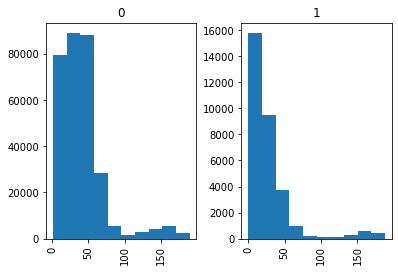

In [28]:
df_features_y.hist(column='distanceNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

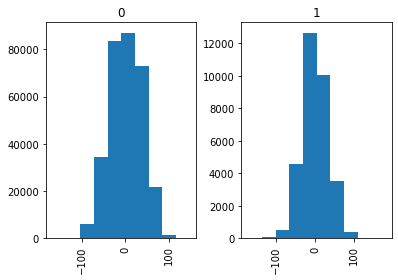

In [27]:
df_features_y.hist(column='angleNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

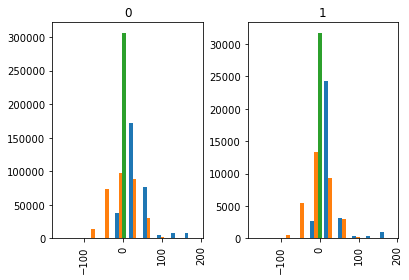

In [31]:
df_features_y.hist(column=['distanceNet', 'angleNet'], by='isGoal')